In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.inspection import permutation_importance
from sklearn import preprocessing

C:\Users\surit\AppData\Local\Temp\ipykernel_17688\902492493.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [75]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [76]:
df.columns = df.columns.str.replace(' ', '')

In [77]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,1.0,0.684783,9,7,1,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,1.0,0.885057,9,7,3,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8,10,442,0.516355,1.0,0.644128,24,1,12,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.539493,1.0,0.692661,10,1,1,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [78]:
def oneHot(data, col):
    data = pd.concat([data,pd.get_dummies(data[col])],axis=1)
    return data

In [79]:
def model_score(model):
    train_pred = model.predict(X_train)
    train_conf_matrix = metrics.confusion_matrix(y_train, train_pred)
    
    test_pred = model.predict(X_test)
    test_conf_matrix = metrics.confusion_matrix(y_test, test_pred)
    
    TN = train_conf_matrix[0][0]
    TP = train_conf_matrix[1][1]
    FP = train_conf_matrix[0][1]
    FN = train_conf_matrix[1][0]

    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    P = df['target'].sum()
    N = df.shape[0]-df['target'].sum()

    lift_P = sensitivity/(P/(P+N))
    lift_N = specificity/(N/(P+N))
    
    print("TRAIN")
    print("TP = " + str(TP))
    print("TN = " + str(TN))
    print("FP = " + str(FP))
    print("FN = " + str(FN))
    print("Sensitivity = " + str(sensitivity))
    print("Specificity = " + str(specificity))
    print("Random selection felt = " + str(P/(P+N)))
    print("Random selection of spec " + str(N/(P+N)))
    print("Increment (lift) felt = " + str(lift_P))
    print("Increment (lift) spec = " + str(lift_N))
    
    TN = test_conf_matrix[0][0]
    TP = test_conf_matrix[1][1]
    FP = test_conf_matrix[0][1]
    FN = test_conf_matrix[1][0]

    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    P = df['target'].sum()
    N = df.shape[0]-df['target'].sum()

    lift_P = sensitivity/(P/(P+N))
    lift_N = specificity/(N/(P+N))
    
    print('TEST')
    print("TP = " + str(TP))
    print("TN = " + str(TN))
    print("FP = " + str(FP))
    print("FN = " + str(FN))
    print("sensitivity = " + str(sensitivity))
    print("Specificity = " + str(specificity))
    print("Random selection felt = " + str(P/(P+N)))
    print("Random selection of spec " + str(N/(P+N)))
    print("Increment (lift) felt = " + str(lift_P))
    print("Increment (lift) spec = " + str(lift_N))

In [80]:
def roc_curve(model, model_name):
    pred_prob_train = model.predict_proba(X_train)
    preds_train = pred_prob_train[:, 1]
    spec_train, felt_train, treshold_train = metrics.roc_curve(y_train, preds_train)
    roc_auc_train = metrics.auc(spec_train, felt_train)

    pred_prob_test = model.predict_proba(X_test)
    preds_test = pred_prob_test[:,1]
    spec_test, felt_test, treshold_test = metrics.roc_curve(y_test, preds_test)
    roc_auc_test = metrics.auc(spec_test, felt_test)

    print("AUC train = " + str(roc_auc_train))
    print("AUC test = " + str(roc_auc_test))
    
    plt.figure(figsize=(8,8))
    plt.plot(spec_test, felt_test, label='Test',color = (255/255, 59/255, 59/255))
    plt.plot(spec_train, felt_train, label='Train', color = (0/255, 60/255, 201/255))
    plt.plot([0, 1], [0, 1], '--', color = (41/255, 41/255, 41/255))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xticks(np.arange(0, 1.1, step=0.1))
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xlabel('1 - Specificity',fontsize=13)
    plt.ylabel('sensitivity',fontsize=13)
    plt.title(f'ROC curve for model {model_name}',fontsize=13)
    plt.legend(loc='lower right',fontsize = 13)
    plt.savefig(model_name+".png")
    plt.show()

In [81]:
### TARGET
df['target'] = np.where(df['shares']>=1400, 1, 0)

In [82]:
print(df[['shares','target']])
print("A number greater than or equal to 1400: ", df['target'].sum())
print("Number less than 1400: ", df.shape[0]-df['target'].sum())

       shares  target
0         593       0
1         711       0
2        1500       1
3        1200       0
4         505       0
...       ...     ...
39639    1800       1
39640    1900       1
39641    1900       1
39642    1100       0
39643    1300       0

[39644 rows x 2 columns]
A number greater than or equal to 1400:  21154
Number less than 1400:  18490


## diff max min positive polarity i diff max min negative polarity

In [83]:
df['diff_max_min_positive_polarity'] = df['max_positive_polarity'] - df['min_positive_polarity']

In [84]:
df['diff_max_min_negative_polarity'] = df['max_negative_polarity'] - df['min_negative_polarity']

## world_enter i tech_socmed i life_socmed i other

In [85]:
conditions = [
    (df['data_channel_is_lifestyle'] == 1),
    (df['data_channel_is_entertainment'] == 1),
    (df['data_channel_is_bus'] == 1),
    (df['data_channel_is_socmed'] == 1),
    (df['data_channel_is_tech'] == 1),
    (df['data_channel_is_world'] == 1),
    (df['data_channel_is_world']+df['data_channel_is_tech']+df['data_channel_is_socmed']+df['data_channel_is_bus']+df['data_channel_is_bus']+df['data_channel_is_entertainment']+df['data_channel_is_lifestyle']==0)]
choices = ["Lifestyle", "Entertainment", 'Bus','Socmed','Tech','World','Other']
df['data_channel'] = np.select(conditions, choices)
print(df['data_channel'])

0        Entertainment
1                  Bus
2                  Bus
3        Entertainment
4                 Tech
             ...      
39639             Tech
39640           Socmed
39641            Other
39642            World
39643    Entertainment
Name: data_channel, Length: 39644, dtype: object


In [86]:
df = oneHot(df, 'data_channel')

In [87]:
df.columns[65:72]

Index(['Bus', 'Entertainment', 'Lifestyle', 'Other', 'Socmed', 'Tech',
       'World'],
      dtype='object')

In [88]:
dc = df.columns.values[65:72]

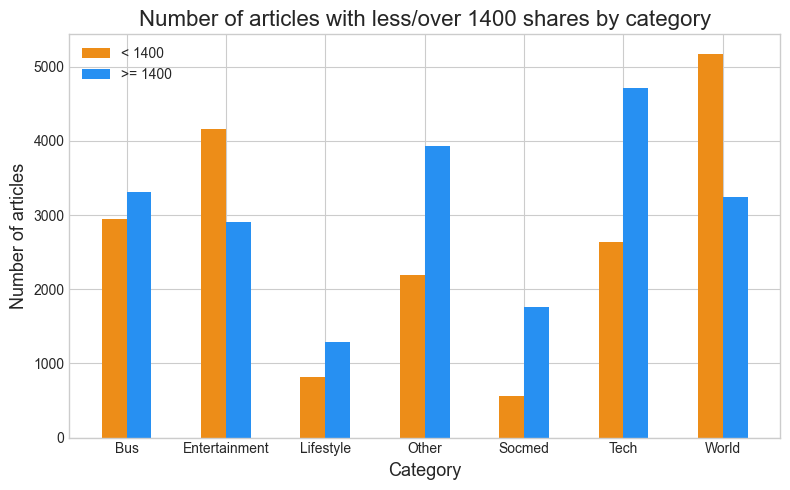

In [89]:
unpopular = df[df['shares']<1400]
popular = df[df['shares']>=1400]

how_many_unpopular = unpopular[dc].sum()
how_many_popular = popular[dc].sum()

fig = plt.figure(figsize = (8,5))

plt.title("Number of articles with less/over 1400 shares by category", fontsize = 16)
plt.bar(np.arange(len(dc)) - 0.125, how_many_unpopular, width = 0.25, align = "center", color = (237/255, 141/255, 24/255), label = "< 1400")
plt.bar(np.arange(len(dc)) + 0.125, how_many_popular, width = 0.25, align="center", color = (39/255, 144/255, 242/255), label = ">= 1400")

plt.xticks(np.arange(len(dc)), dc)
plt.ylabel("Number of articles", fontsize = 13)
plt.xlabel("Category", fontsize = 13)
    
plt.legend(loc = 'upper left')
plt.tight_layout()

plt.show()

In [90]:
conditions = [
    ((df['data_channel'].str.lower() == 'world') | (df['data_channel'].str.lower() == 'entertainment')),
    ((df['data_channel'].str.lower() == 'lifestyle') | (df['data_channel'].str.lower() == 'socmed')),
    ((df['data_channel'].str.lower() == 'other') | (df['data_channel'].str.lower() == 'tech')),
    ((df['data_channel'].str.lower() is not 'world') & (df['data_channel'].str.lower() is not 'entertainment') & (df['data_channel'].str.lower() is not 'tech') & (df['data_channel'].str.lower() is not 'socmed') & (df['data_channel'].str.lower() is not 'lifestyle') & (df['data_channel'].str.lower() is not 'other'))]
choices = ["dc_is_world_enter","dc_is_lifestyle_socmed","dc_is_tech_other","dc_is_bus"]
df['dc_cat'] = np.select(conditions, choices)

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\surit\AppData\Local\Temp\ipykernel_17688\2138372358.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  ((df['data_channel'].str.lower() is not 'world') & (df['data_channel'].str.lower() is not 'e

In [91]:
df = oneHot(df, 'dc_cat')

In [92]:
Wd = df.columns.values[31:38]
Wd2 = ['Monday', "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

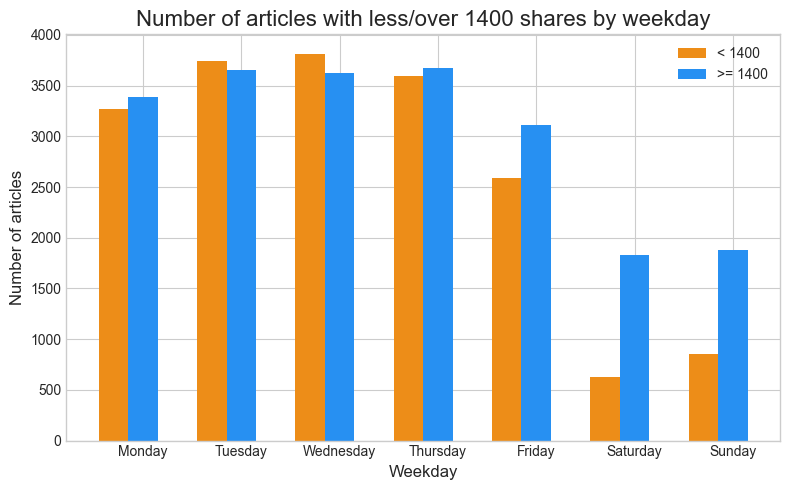

In [93]:
Unpop=df[df['shares']<1400]
Pop=df[df['shares']>=1400]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (8,5))

plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = (237/255, 141/255, 24/255), label = "< 1400")
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = (39/255, 144/255, 242/255), label = ">= 1400")
plt.xticks(np.arange(len(Wd2)), Wd2)
plt.title("Number of articles with less/over 1400 shares by weekday", fontsize = 16)
plt.ylabel("Number of articles", fontsize = 12)
plt.xlabel("Weekday", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()

plt.show()

## n_art_in_day i n_art_in_day podzial and category

In [94]:
df['n_art_in_day'] = df['shares'].groupby(df['timedelta']).transform('count')


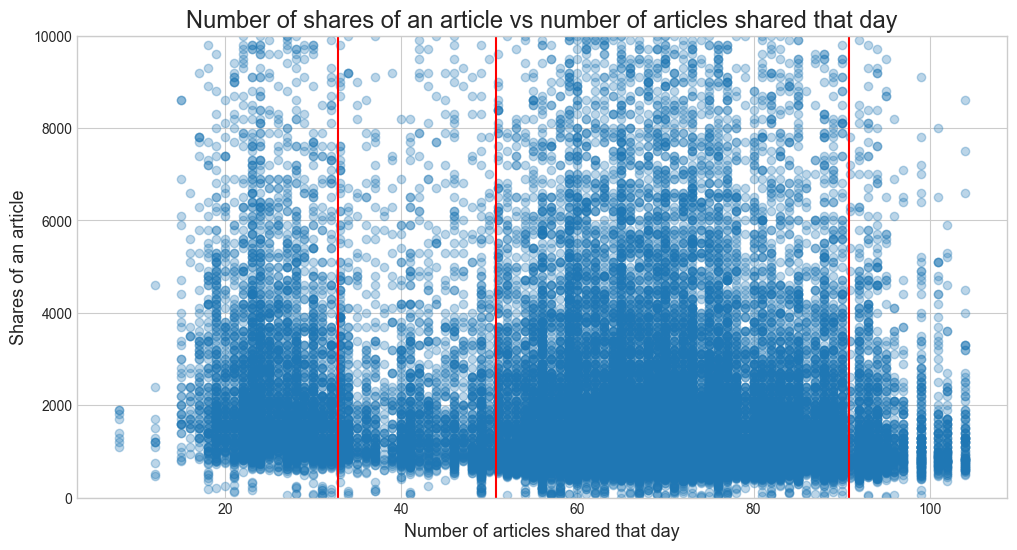

In [95]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['n_art_in_day'], df["shares"],alpha=0.3)

line = mlines.Line2D([0.28, 0.28], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

line = mlines.Line2D([0.45, 0.45], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

line = mlines.Line2D([0.83, 0.83], [1,0], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

#ax.set_title("Liczba udostępnień artykułów w zależności od liczby artykułów opublikowanych w dniu",fontsize=17)
ax.set_title("Number of shares of an article vs number of articles shared that day",fontsize=17)
ax.set_ylabel("Shares of an article",fontsize=13)
ax.set_xlabel("Number of articles shared that day",fontsize=13)
ax.set_ylim(0, 10000)
plt.show()

In [96]:
conditions = [
    (df['n_art_in_day'] < 32),
    ((df['n_art_in_day'] >= 32) & (df['n_art_in_day'] < 51)),
    ((df['n_art_in_day'] >= 51) & (df['n_art_in_day'] < 90)),
    (df['n_art_in_day'] >= 90)]
choices = ["n_art_in_day_under_32","n_art_in_day_between_32_51","n_art_in_day_between_51_90","n_art_in_day_over_90"]
df['n_art_in_day_over_under'] = np.select(conditions, choices)

In [97]:
df = oneHot(df,'n_art_in_day_over_under')

## tokens_content_per_tokens_title

In [98]:
df['tok_content_per_tok_title'] = df['n_tokens_content'] /df['n_tokens_title']

In [99]:
df['tok_content_per_tok_title']

0         18.250000
1         28.333333
2         23.444444
3         59.000000
4         82.461538
            ...    
39639     31.454545
39640     27.333333
39641     44.200000
39642    113.666667
39643     15.700000
Name: tok_content_per_tok_title, Length: 39644, dtype: float64

## multimedia

In [100]:
over = 1
conditions = [
    (df['num_imgs']+df['num_videos'] > over),
    (df['num_imgs']+df['num_videos'] <= over)]
choices = [1,0]
df['mult_over_1'] = np.select(conditions, choices)

In [101]:
unpopular = df[df['shares']<1400]
popular = df[df['shares']>=1400]
how_many_unpopular = unpopular['mult_over_1'].sum()
how_many_popular = popular['mult_over_1'].sum()
print("Ratio of popular to unpopular articles for articles with more than 1 media aspect: " + str(how_many_popular/how_many_unpopular))

how_many_unpopular = df.shape[0]-unpopular['mult_over_1'].sum()
how_many_popular = df.shape[0]-popular['mult_over_1'].sum()
print("Ratio of popular to unpopular articles for articles with a maximum of 1 media aspect: " + str(how_many_popular/how_many_unpopular))

Ratio of popular to unpopular articles for articles with more than 1 media aspect: 1.3335909040732972
Ratio of popular to unpopular articles for articles with a maximum of 1 media aspect: 0.9011933954552885


## hrefs_ratio

In [102]:
df['hrefs_ratio'] = df['num_self_hrefs']/df['num_hrefs']
df = df.fillna(0,axis=1)

In [103]:
unpopular = df[df['shares']<1400]
popular = df[df['shares']>=1400]
sr_unpopular = unpopular['hrefs_ratio'].mean()
sr_popular= popular['hrefs_ratio'].mean()
print("Average for popular: " + str(sr_popular))
print("Average for unpopular: " + str(sr_unpopular))

Average for popular: 0.39452788241302095
Average for unpopular: 0.4274381358128969


In [104]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [105]:
cols = [ 'timedelta','n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_unique_tokens','num_hrefs','num_self_hrefs',
         'num_imgs','num_videos','average_token_length','num_keywords','kw_avg_min','kw_avg_max','kw_avg_avg','kw_min_min','kw_min_max','kw_min_avg','kw_max_min','kw_max_max','kw_max_avg',
         'self_reference_avg_sharess','LDA_00','LDA_01','LDA_02','LDA_03','LDA_04',
         'global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
         'avg_positive_polarity','avg_negative_polarity','title_subjectivity','title_sentiment_polarity',
         'is_weekend','data_channel_is_tech','data_channel_is_bus','data_channel_is_lifestyle','data_channel_is_world','data_channel_is_entertainment','data_channel_is_socmed',
         'min_positive_polarity', 'max_positive_polarity', 'min_negative_polarity', 'max_negative_polarity',
         'tok_content_per_tok_title', 'n_art_in_day', 'hrefs_ratio',
         'mult_over_1',
         'dc_is_lifestyle_socmed','dc_is_world_enter','dc_is_tech_other',
         'n_art_in_day_under_32','n_art_in_day_between_32_51','n_art_in_day_between_51_90',
         'target']
len(cols)

56

In [106]:
data = df[cols]

In [107]:
data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,n_art_in_day,hrefs_ratio,mult_over_1,dc_is_lifestyle_socmed,dc_is_world_enter,dc_is_tech_other,n_art_in_day_under_32,n_art_in_day_between_32_51,n_art_in_day_between_51_90,target
0,731,12,219,0.663594,0.815385,4,2,1,0,4.680365,...,79,0.5,0,0,1,0,0,0,1,0
1,731,9,255,0.604743,0.791946,3,1,1,0,4.913725,...,79,0.333333,0,0,0,0,0,0,1,0
2,731,9,211,0.57513,0.663866,3,1,1,0,4.393365,...,79,0.333333,0,0,0,0,0,0,1,1
3,731,9,531,0.503788,0.665635,9,0,1,0,4.404896,...,79,0.0,0,0,1,0,0,0,1,0
4,731,13,1072,0.415646,0.54089,19,19,20,0,4.682836,...,79,1.0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8,11,346,0.529052,0.684783,9,7,1,1,4.523121,...,8,0.777778,1,0,0,1,1,0,0,1
39640,8,12,328,0.696296,0.885057,9,7,3,48,4.405488,...,8,0.777778,1,1,0,0,1,0,0,1
39641,8,10,442,0.516355,0.644128,24,1,12,1,5.076923,...,8,0.041667,1,0,0,1,1,0,0,1
39642,8,6,682,0.539493,0.692661,10,1,1,0,4.975073,...,8,0.1,0,0,1,0,1,0,0,0


In [108]:
def Normalize(X):
    cols = X.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(X.values)
    data_x = pd.DataFrame(x_scaled, columns = cols)
    return data_x

In [109]:
data1 = Normalize(data)

In [110]:
data1

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,n_art_in_day,hrefs_ratio,mult_over_1,dc_is_lifestyle_socmed,dc_is_world_enter,dc_is_tech_other,n_art_in_day_under_32,n_art_in_day_between_32_51,n_art_in_day_between_51_90,target
0,1.0,0.476190,0.025844,0.000947,0.001254,0.013158,0.017241,0.007812,0.000000,0.582024,...,0.739583,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.333333,0.030092,0.000863,0.001218,0.009868,0.008621,0.007812,0.000000,0.611043,...,0.739583,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.333333,0.024900,0.000820,0.001021,0.009868,0.008621,0.007812,0.000000,0.546334,...,0.739583,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.333333,0.062662,0.000719,0.001024,0.029605,0.000000,0.007812,0.000000,0.547768,...,0.739583,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.523810,0.126505,0.000593,0.000832,0.062500,0.163793,0.156250,0.000000,0.582331,...,0.739583,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.0,0.428571,0.040831,0.000755,0.001054,0.029605,0.060345,0.007812,0.010989,0.562470,...,0.000000,0.777778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
39640,0.0,0.476190,0.038707,0.000993,0.001362,0.029605,0.060345,0.023438,0.527473,0.547842,...,0.000000,0.777778,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
39641,0.0,0.380952,0.052160,0.000737,0.000991,0.078947,0.008621,0.093750,0.010989,0.631338,...,0.000000,0.041667,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
39642,0.0,0.190476,0.080481,0.000770,0.001066,0.032895,0.008621,0.007812,0.000000,0.618672,...,0.000000,0.100000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [111]:
data.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords', 'kw_avg_min',
       'kw_avg_max', 'kw_avg_avg', 'kw_min_min', 'kw_min_max', 'kw_min_avg',
       'kw_max_min', 'kw_max_max', 'kw_max_avg', 'self_reference_avg_sharess',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'is_weekend', 'data_channel_is_tech',
       'data_channel_is_bus', 'data_channel_is_lifestyle',
       'data_channel_is_world', 'data_channel_is_entertainment',
       'data_channel_is_socmed', 'min_positive_polarity',
       'max_positive_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'tok_con

In [112]:
X = data1.drop(columns=['target'])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, data1['target'], random_state=1, test_size = 0.4)

In [114]:
X_train

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,tok_content_per_tok_title,n_art_in_day,hrefs_ratio,mult_over_1,dc_is_lifestyle_socmed,dc_is_world_enter,dc_is_tech_other,n_art_in_day_under_32,n_art_in_day_between_32_51,n_art_in_day_between_51_90
21710,0.408022,0.380952,0.054402,0.000737,0.000988,0.036184,0.008621,0.062500,0.000000,0.575375,...,0.048962,0.562500,0.090909,1.0,0.0,0.0,1.0,0.0,0.0,1.0
17567,0.526971,0.476190,0.118362,0.000594,0.000856,0.095395,0.017241,0.195312,0.010989,0.569947,...,0.088772,0.197917,0.068966,1.0,0.0,1.0,0.0,1.0,0.0,0.0
20611,0.437068,0.380952,0.044017,0.000737,0.000993,0.026316,0.068966,0.007812,0.000000,0.552427,...,0.039615,0.489583,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
24358,0.340249,0.333333,0.064904,0.000659,0.000890,0.023026,0.043103,0.007812,0.000000,0.585596,...,0.064904,0.677083,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29240,0.228216,0.285714,0.120250,0.000691,0.001059,0.036184,0.008621,0.007812,0.000000,0.603100,...,0.135281,0.208333,0.090909,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0.796680,0.285714,0.092164,0.000697,0.001002,0.046053,0.017241,0.007812,0.000000,0.605849,...,0.103685,0.500000,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32511,0.153527,0.428571,0.045551,0.000834,0.001115,0.052632,0.034483,0.015625,0.000000,0.554118,...,0.037269,0.770833,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5192,0.871369,0.476190,0.017583,0.000954,0.001210,0.003289,0.000000,0.000000,0.000000,0.561681,...,0.013187,0.593750,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12172,0.677732,0.428571,0.016639,0.000988,0.001359,0.006579,0.008621,0.000000,0.000000,0.591786,...,0.013614,0.635417,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## DecisionTreeClassifier

In [115]:

dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split = 200, min_samples_leaf = 100, max_depth=20, max_leaf_nodes=50)
dtc.fit(X_train,y_train)
print("Training accuracy = "+str(dtc.score(X_train,y_train)))
print("Testing accuracy = "+str(dtc.score(X_test,y_test)))

Training accuracy = 0.667493483561759
Testing accuracy = 0.6524782444192205


In [116]:
model_score(dtc)

TRAIN
TP = 8622
TN = 7255
FP = 3875
FN = 4034
Sensitivity = 0.6812579013906448
Specificity = 0.6518418688230009
Random selection felt = 0.5335990313792756
Random selection of spec 0.46640096862072444
Increment (lift) felt = 1.27672252258347
Increment (lift) spec = 1.3975997321589533
TEST
TP = 5667
TN = 4680
FP = 2680
FN = 2831
sensitivity = 0.6668627912449988
Specificity = 0.6358695652173914
Random selection felt = 0.5335990313792756
Random selection of spec 0.46640096862072444
Increment (lift) felt = 1.2497451307609309
Increment (lift) spec = 1.3633538693065583


AUC train = 0.7216504847890066
AUC test = 0.6984314723668997


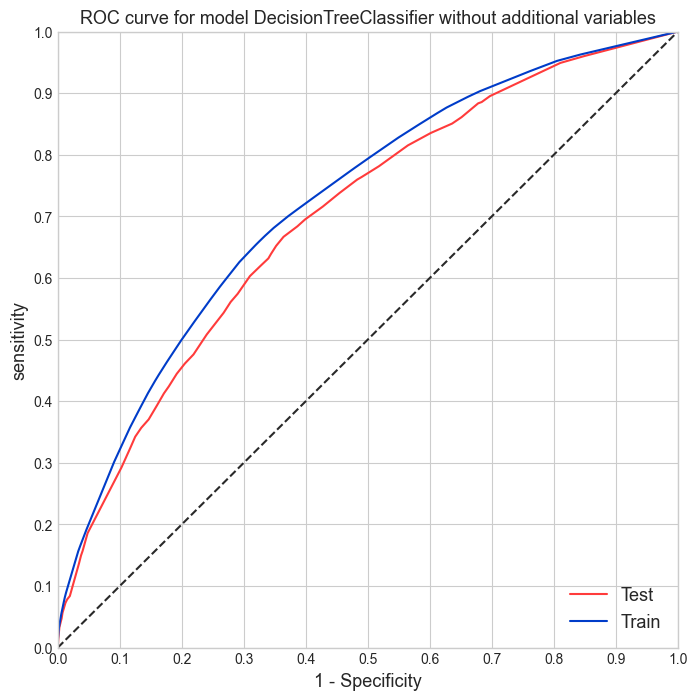

In [117]:
roc_curve(dtc,'DecisionTreeClassifier without additional variables')

## Decision tree from Scratch

In [130]:
import pandas as pd
import numpy as np

class DecisionTree:
    def __init__(self):
        self.tree = None

    def entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def information_gain(self, X, y, feature):
        entropy_before = self.entropy(y)

        values, counts = np.unique(X[feature], return_counts=True)
        weighted_entropies = np.zeros(len(values))

        for i, value in enumerate(values):
            subset_y = y[X[feature] == value]
            weighted_entropies[i] = (len(subset_y) / len(y)) * self.entropy(subset_y)

        entropy_after = np.sum(weighted_entropies)
        information_gain = entropy_before - entropy_after
        return information_gain

    def best_split(self, X, y):
        best_feature = None
        best_gain = 0

        for feature in X.columns:
            gain = self.information_gain(X, y, feature)
            if gain > best_gain:
                best_feature = feature
                best_gain = gain

        return best_feature

    def most_common_class(self, y):
        classes, counts = np.unique(y, return_counts=True)
        most_common_class = classes[np.argmax(counts)]
        return most_common_class

    def fit(self, X, y):
        if len(np.unique(y)) == 1:
            self.tree = np.unique(y)[0]
            return

        if len(X.columns) == 0:
            self.tree = self.most_common_class(y)
            return

        best_feature = self.best_split(X, y)
        if best_feature is None:
            self.tree = self.most_common_class(y)
            return

        self.tree = {}
        values = np.unique(X[best_feature])

        for value in values:
            subset_X = X[X[best_feature] == value]
            subset_y = y[X[best_feature] == value]
            self.tree[(best_feature, value)] = DecisionTree()
            self.tree[(best_feature, value)].fit(subset_X.drop(best_feature, axis=1), subset_y)
            
    def predict(self, X):
        if isinstance(self.tree, dict):
            feature, value = next(iter(self.tree))
            if isinstance(X[feature], pd.Series):
                return X.apply(lambda x: self.tree[(feature, value)].predict(x.to_frame().T) if x[feature] == value else None, axis=1)
            else:
                return self.tree[(feature, value)].predict(X.drop(feature, axis=1))
        else:
            return self.tree



In [138]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        


In [148]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [144]:
clf = DecisionTree()
clf.fit(X_train.values, y_train.values)

In [149]:
predictions = clf.predict(X_test.values)

# Calculate the accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.584058519359314
